# **Load Required Libraries**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load your dataset (update filename accordingly)
file_path = "/kaggle/input/tesla-stock-price-history/Tesla_stock_data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


# **Removing Warnings**

In [3]:
import warnings
warnings.filterwarnings('ignore')



# **Download Data From Yahoo Finance**

In [4]:

# Download Tesla stock data from Yahoo Finance
data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


# **Inspect the Dataset**

In [5]:
# Check columns and shape
print("Columns:", df.columns)
print("Shape:", df.shape)


Columns: Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Shape: (3782, 6)


# **Load Historical Tesla Stock Data**

In [6]:
df = yf.download("TSLA", start="2020-01-01", end="2023-12-31", progress=False)


In [7]:
# If multi-indexed, flatten it
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]


# **Prepare Features & Train-Test Split**

In [8]:
# Shift Close column to create next day's target
data['Target_Close'] = data['Close'].shift(-1)

# Drop the last row with NaN target
data.dropna(inplace=True)

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target_Close']

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# **Applying Linear Regression**


📈 Linear Regression Evaluation:
✅ RMSE: 10.078303424088892
✅ R² Score: 0.9792768062496515


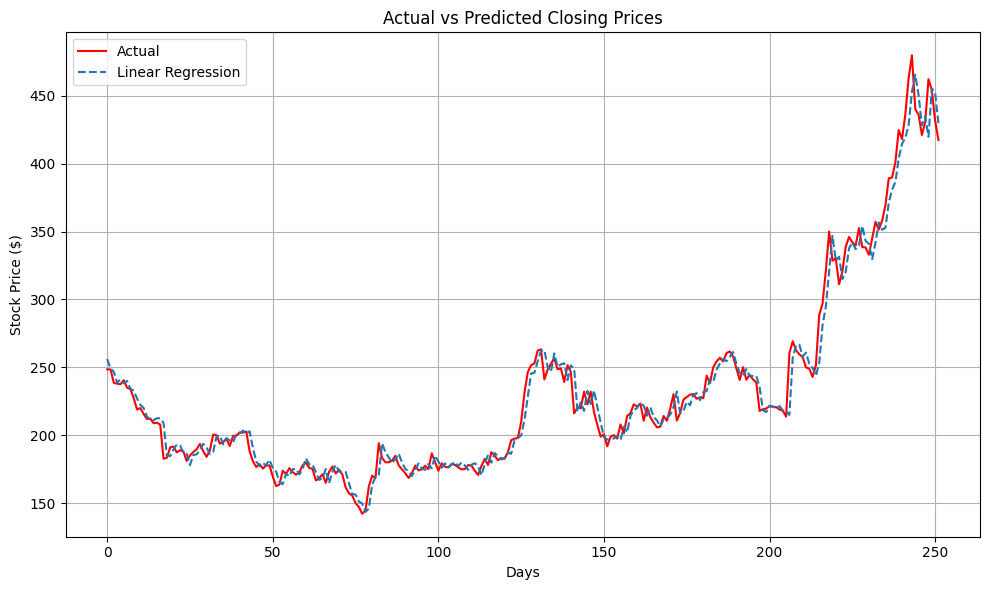

In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

#  Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📈 {model_name} Evaluation:")
    print("✅ RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("✅ R² Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, lr_preds, "Linear Regression")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(lr_preds, label='Linear Regression', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **🗃️ Save Model**

In [10]:
import joblib
joblib.dump(lr, "linear_model_tesla.pkl")

['linear_model_tesla.pkl']

# **Applying Random Forest**


📈 Random Forest Evaluation:
✅ RMSE: 14.126274035017582
✅ R² Score: 0.9592866271569916


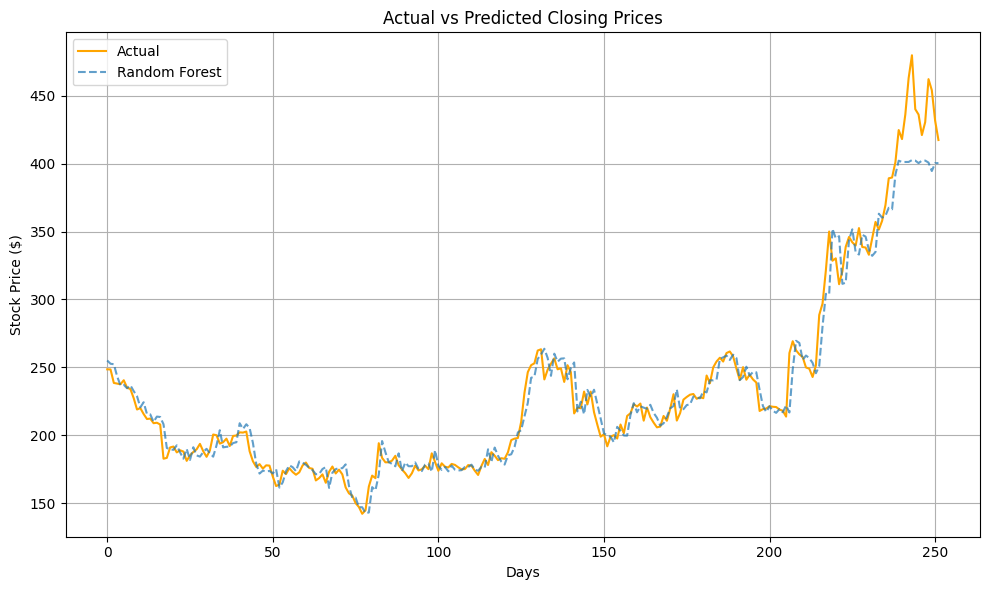

In [11]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Step 8: Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📈 {model_name} Evaluation:")
    print("✅ RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("✅ R² Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, rf_preds, "Random Forest")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='orange')
plt.plot(rf_preds, label='Random Forest', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **🗃️ Save Model**

In [12]:
import joblib
joblib.dump(rf, "Random Forest_tesla.pkl")


['Random Forest_tesla.pkl']

# **Model  Comparison**

**Bar Plot for RMSE and R² Scores**

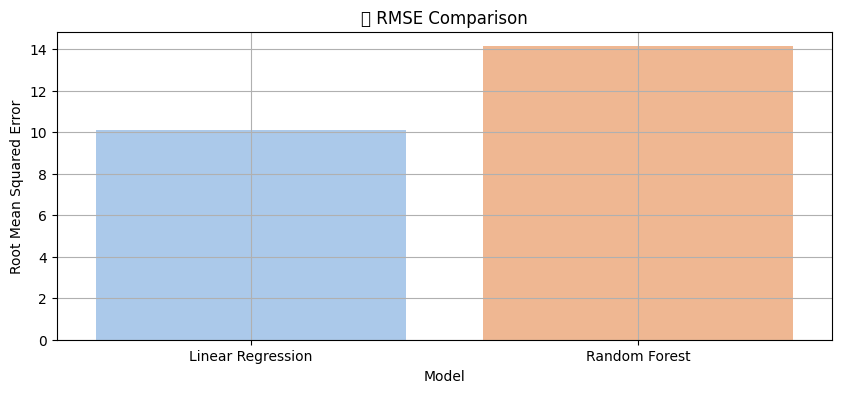

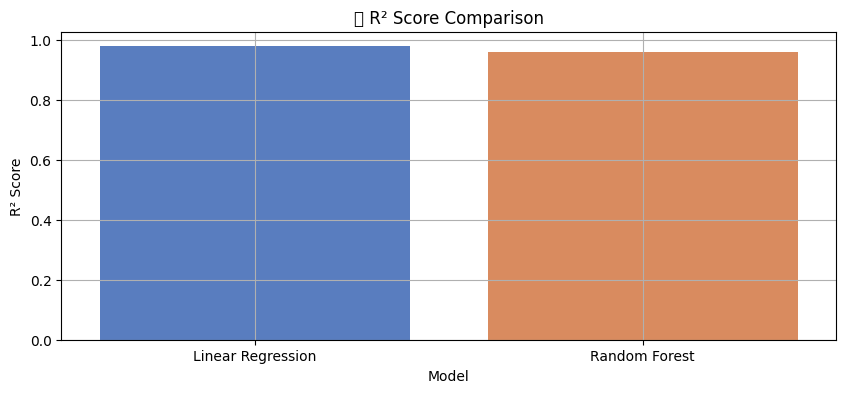

In [13]:
import seaborn as sns

# Prepare performance metrics
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [mean_squared_error(y_test, lr_preds, squared=False),
             mean_squared_error(y_test, rf_preds, squared=False)],
    'R2 Score': [r2_score(y_test, lr_preds),
                 r2_score(y_test, rf_preds)]
})

# Plot RMSE
plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='RMSE', data=metrics, palette='pastel')
plt.title('📉 RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='R2 Score', data=metrics, palette='muted')
plt.title('📈 R² Score Comparison')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()


# **📈 Task 2: Predicting Next-Day Tesla Stock Price**


# **🎯 Objective**
To build a machine learning model that uses historical stock data (Open, High, Low, Volume) to predict the next day's closing price of Tesla (TSLA).

# **🛠️ Tools & Technologies Used**

Data Source: yfinance (real-time stock data)

Language: Python

Libraries: pandas, yfinance, scikit-learn, matplotlib, seaborn

# **🔢 Steps Performed**

**Data Collection:**

Downloaded Tesla stock data (2020–2023) using the yfinance API.

# **Feature Engineering:**

Created a new column Target_Close by shifting the ‘Close’ price to the next day to serve as the prediction target.

# **Preprocessing:**

Removed missing values and selected relevant features: Open, High, Low, Volume.

# **Train-Test Split:**

Used 80% of the data for training and 20% for testing (without shuffling, to preserve time order).

# **Model Training:**

**Linear Regression:**

Simple, interpretable model for regression.

**Random Forest Regressor:**

Ensemble method for better generalization.

# **Evaluation Metrics:**

RMSE (Root Mean Squared Error): Measures prediction error in dollars.

R² Score: Explains variance captured by the model.

# **Visualization:**

**Line plot:**

Actual vs predicted prices

**Bar charts:**

RMSE and R² scores for both models

# **📊 Results**

**Model	RMSE	R² Score
Linear Regression	10.08	0.979
Random Forest	14.13	0.959**

Linear Regression performed slightly better, indicating a mostly linear relationship between input features and next-day price.

# **✅ Key Takeaways**

Stock price prediction is feasible using historical data and regression models.

Time series integrity (no shuffling) is crucial in financial data.

Simple models can outperform complex ones when data is clean and patterns are linear.